### Importing libraries

In [41]:
#python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
!pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_precision_recall_curve, accuracy_score, roc_auc_score, log_loss
import warnings
warnings.filterwarnings("ignore")

### Data loading

In [42]:
data = pd.read_csv('/content/drive/MyDrive/Assignmnet/seismic_bumps.csv')
data.head() 

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


#### Attribute information:
1. seismic: shift seismic hazard in the coal mine obtained by the seismic; hazard state as(a : lack, b : low, c : high, d : danger state);
2. seismoacoustic: shift seismic hazard  in the coal mine obtained by the this method;
3. shift: type of a shift (W : coal-getting, N : preparation shift);
4. genergy: energy recorded within shift previously using most active GMax 
5. gpuls: number of pulses recorded  by GMax within previous shift;
6. gdenergy: deviation of energy recorded by GMax from average
during eight previous shifts
7. gdpuls: deviation of number of pulses
8. ghazard: shift seismic hazard assessment in the coal mine based on registration from GMax
9. nbumps: number of seismic bumps
10. nbumps2: number of seismic bumps (in energy range [10^2,10^3)) 
11. nbumps3: number of seismic bumps (in energy range [10^3,10^4)) 
12. nbumps4: number of seismic bumps (in energy range [10^4,10^5))
13. nbumps5: number of seismic bumps (in energy range [10^5,10^6))
14. nbumps6: number of seismic bumps (in energy range [10^6,10^7))
15. nbumps7: number of seismic bumps (in energy range [10^7,10^8))
16. nbumps89: number of seismic bumps (in energy range [10^8,10^10))
17. energy: total energy of seismic bumps
18. maxenergy: maximum energy of the seismic bumps
19. class: 1; seismic bumps leads to hazardous state or 0; Non hazardous state

In [43]:
#number of instances and atttributes
data.shape

(2584, 19)

### Dataset basic information

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   ghazard         2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9    nbumps2        2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

Some attributes are of object type that means it contains string values so these are needed to be encoded

In [45]:
data.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


A brief description of data is given above with its mean, min-max values, and other statiscal measures.

In [46]:
#Observing null values, if any.
data.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
 nbumps2          0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

This null value count represents that the dataset is free from noise; null value are not there. 

### EDA: Exploratory Data Analysis

##### Observing target feature

0    2414
1     170
Name: class, dtype: int64


Text(0, 0.5, 'count')

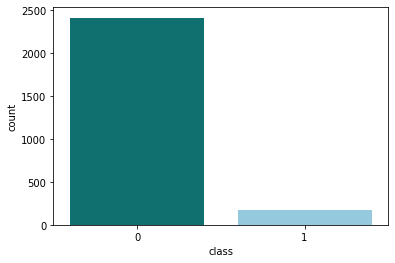

In [47]:
#examining target feature
print(data['class'].value_counts())

#count plot of each class in target feature
sns.countplot(x=data['class'], palette=['teal', 'skyblue'])
plt.xlabel('class')
plt.ylabel('count')

This represents that the target feature is having binary values; 0 and 1 representing Non-hazardous state and hazardous state, respectively.

Observing that, we can say that instances of Non-hazardous state are more than instances of hazardous state.

##### Observing features via pearson correlation matrix

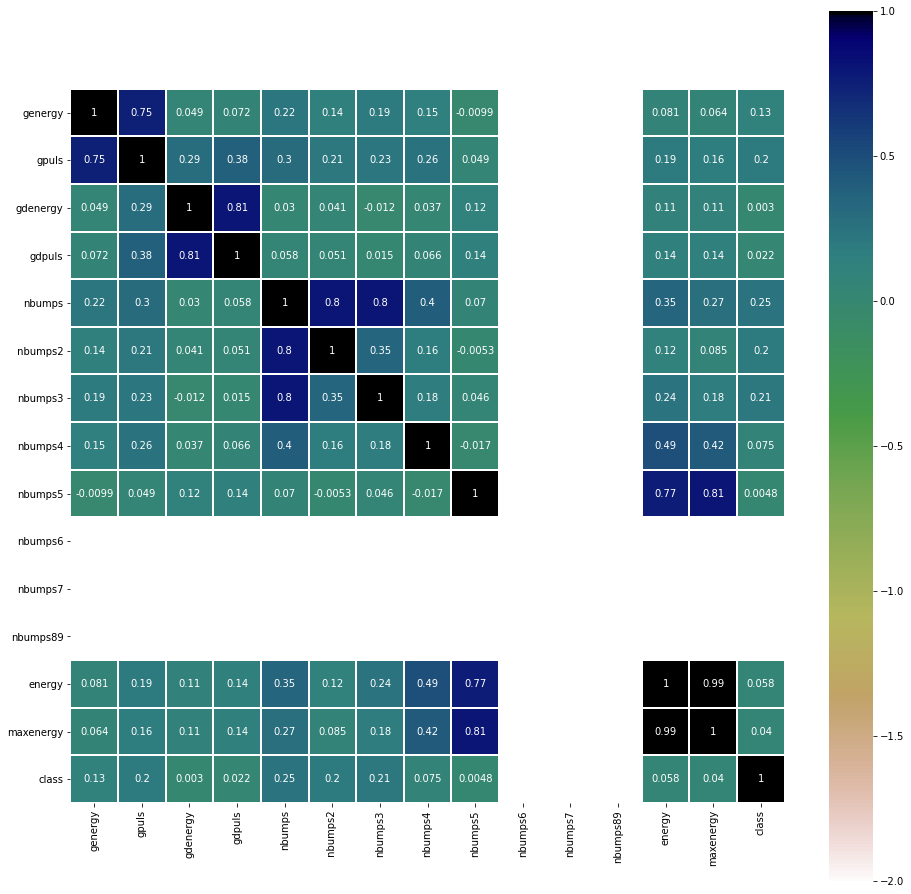

In [48]:
#Pearson's correlation matrix
plt.figure(figsize=(16,16))
sns.heatmap(data=data.corr(), vmax=1, vmin=-2, cmap='gist_earth_r', square=True, annot=True, linewidths=1)

In the above heatmap, it is observed that genergy and gpuls are strongly correlated along with gdenergy and gdpuls. Energy and maxenergy are seem to be perfectly correlated due to having high correlation coefficient values.

On the other side, 'nbumps6', 'nbumps7', and 'nbumps89' are least correlated, therefore these can be removed.



##### Countplots of some all attributes

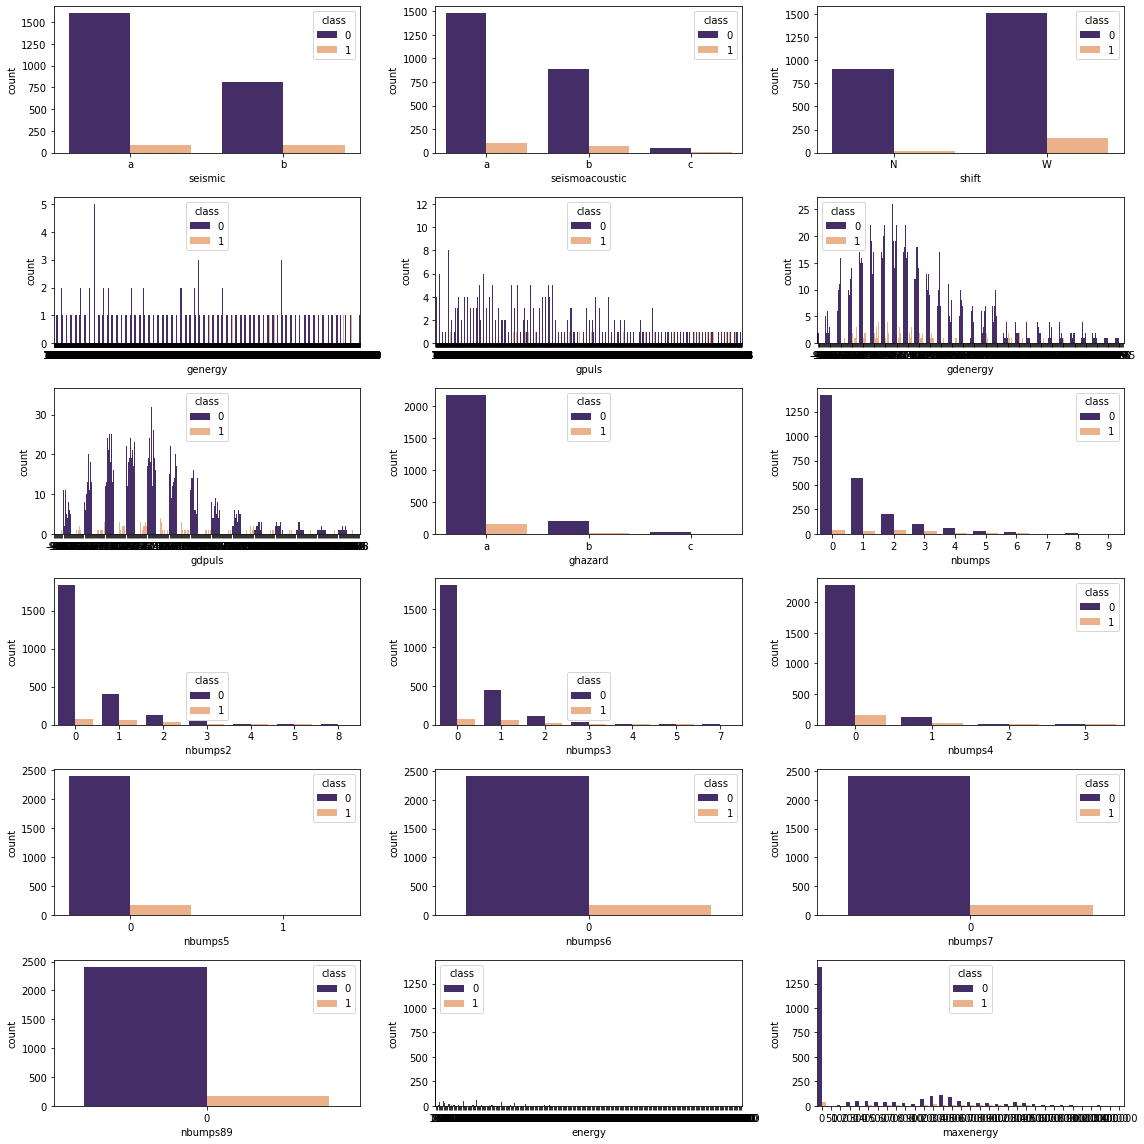

In [49]:
#countplots of attributes
columns = [col for col in data.columns if col!='class']
plt.figure(figsize = (16,16))
for i, col in enumerate(columns):
    plt.subplot(6, 3, i+1)
    sns.countplot(x = col, data = data, palette=['#432371',"#FAAE7B"], hue = 'class')
    plt.tight_layout()

Here, 'nbumps6', 'nbumps7', and 'nbumps89' are having all zeros therefore these can be treated as ordinal attributes. These are required to be removed from the data so as to avoid irrelevant data




##### Distplots to observe data skewness and distibution

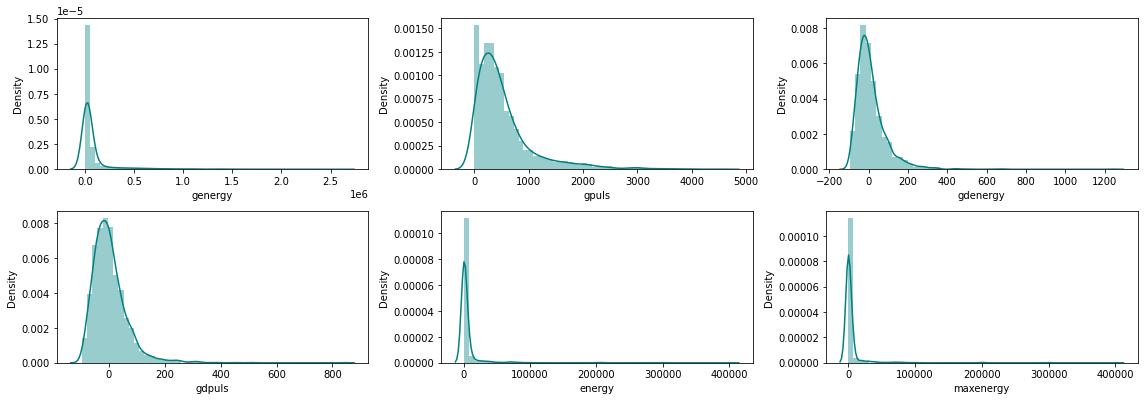

In [50]:
plt.figure(figsize = (16,16))
for i, col in enumerate(['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']):
    plt.subplot(6, 3, i+1)
    sns.distplot(data[col], hist=True, color='teal')
    plt.tight_layout()

It can be seen clearly that dataset, on the basis of all continuous attributes, is properly righlty skewed.

Also, the values of continuous attributes ranges from 0-40000 approximately.

### Cleaning of Data

After exploring dataset using some plots and visuals, some tranformations and cleaning is required.

In [51]:
#removing 'nbumps6', 'nbumps7', and 'nbumps89' features due to having only 1 category of class
data =data.drop(columns=['nbumps6', 'nbumps7', 'nbumps89'], axis=1)

##### Label Encoding and Scaling

In [52]:
# Label Encoding of features of object dtype
for col in data.columns:
  if data[col].dtype=='O':
    data[col] = LabelEncoder().fit_transform(data[col])
  
#data info after encoding

In [53]:
#Standard Scaling over continuous features to adjust values inside some fixed range
for col in ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']:
  data[col] = StandardScaler().fit_transform(data[[col]])

#scaled data looks like
data.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,0,0,0,-0.327561,-0.872073,-1.050711,-1.211459,0,0,0,0,0,0,-0.243327,-0.221087,0
1,0,0,0,-0.329568,-0.898738,-1.025805,-1.322299,0,1,0,1,0,0,-0.145512,-0.117747,0
2,0,0,0,-0.358675,-0.904071,-1.162786,-1.306465,0,0,0,0,0,0,-0.243327,-0.221087,0
3,0,0,0,-0.268038,-0.653424,-0.440526,0.561974,0,1,0,1,0,0,-0.096605,-0.066078,0
4,0,0,0,-0.338645,-0.856075,-0.938636,-0.894775,0,0,0,0,0,0,-0.243327,-0.221087,0


### Splitting data into X and y and Principal Component Analysis
X: Set of indepedent features
y: Dependent features; class

In [54]:
X = data.drop('class', axis=1)
y = data['class']

In [55]:
#splitting data into train and test sets with ratio 80% and 20%, repsectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
#PCA to reduce the dimensionality of data
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = pd.DataFrame(X_train, columns=['PC'+str(i+1) for i in range(10)])

#data with 10 Principle components that holds most of the information
X_train.shape, y_train.shape

((2067, 10), (2067,))

### Models

#### Algorithm 1: Random Forest Classifier

In [57]:
#model with Random Forest Classifier
model1 = RandomForestClassifier()

#training 
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
#prediction
model1_pred =  model1.predict(X_test)

#### Random Forest's Performance

In [59]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, model1_pred))
print('ACCURACY SCORE: ', accuracy_score(y_test, model1_pred))
print('LOG LOSS: ', log_loss(y_test, model1.predict_proba(X_test)))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       483
           1       0.00      0.00      0.00        34

    accuracy                           0.93       517
   macro avg       0.47      0.50      0.48       517
weighted avg       0.87      0.93      0.90       517

ACCURACY SCORE:  0.9323017408123792
LOG LOSS:  0.45210422821559276


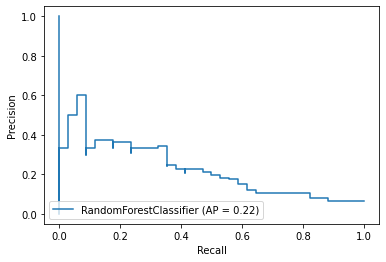

In [60]:
#precision recall curve
plot_precision_recall_curve(estimator=model1, X=X_test, y=y_test)

the precision-recall curve is describing the high area under curve showing high precision and recall values which states low false positive and low false negative rates.

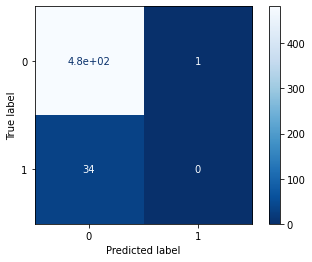

In [61]:
#confusion matrix
plot_confusion_matrix(estimator=model1, X=X_test, y_true=y_test, cmap='Blues_r')

The confusion matrix of this classifier is showing great results with less false predicted values.

#### Algorithm 2: Logistic Regression

In [62]:
#model with Logistic Regression Classifier
model2 = LogisticRegression()

#training 
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
#prediction
model2_pred =  model2.predict(X_test)

#### Logistic Regression's Performance

In [64]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, model2_pred))
print('ACCURACY SCORE: ', accuracy_score(y_test, model2_pred))
print('LOG LOSS: ', log_loss(y_test, model2.predict_proba(X_test)))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       483
           1       0.25      0.03      0.05        34

    accuracy                           0.93       517
   macro avg       0.59      0.51      0.51       517
weighted avg       0.89      0.93      0.90       517

ACCURACY SCORE:  0.9303675048355899
LOG LOSS:  0.21040953044329763


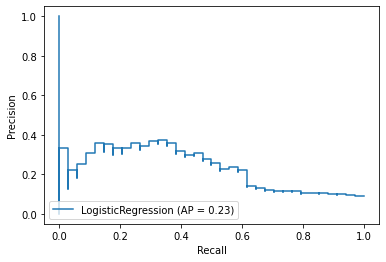

In [65]:
#precision recall curve
plot_precision_recall_curve(estimator=model2, X=X_test, y=y_test)

the precision-recall curve of this model is describing the comparatively low area under curve showing comparatively lower  precision and recall values which states some false positive and false negative rates.

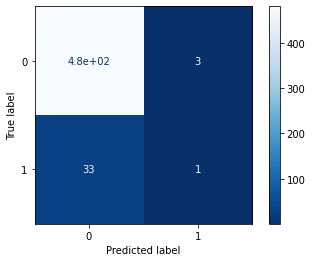

In [66]:
#confusion matrix
plot_confusion_matrix(estimator=model2, X=X_test, y_true=y_test, cmap='Blues_r')

The confusion matrix of this classifier is showing comparatively greater false predicted values.

#### Algorithm 3: Catboost Classifier

In [ ]:
#model with Catboost Classifier
model3 = CatBoostClassifier()

#training 
model3.fit(X_train, y_train)

In [68]:
#prediction
model3_pred =  model3.predict(X_test)

#### Catboost Classifier's Performance

In [69]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, model3_pred))
print('ACCURACY SCORE: ', accuracy_score(y_test, model3_pred))
print('LOG LOSS: ', log_loss(y_test, model3.predict_proba(X_test)))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       483
           1       1.00      0.03      0.06        34

    accuracy                           0.94       517
   macro avg       0.97      0.51      0.51       517
weighted avg       0.94      0.94      0.91       517

ACCURACY SCORE:  0.9361702127659575
LOG LOSS:  0.21372313650287572


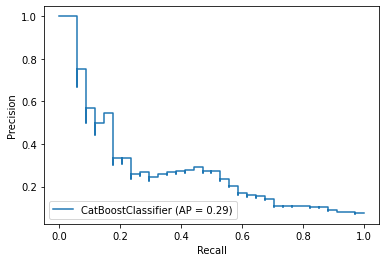

In [70]:
#precision recall curve
plot_precision_recall_curve(estimator=model3, X=X_test, y=y_test)

This precision recall curve is quite similar to the curve obtained from Random Forest classifier but is better than that as it's having a bit higher area under the curve stating the least false positive and false negative rates.

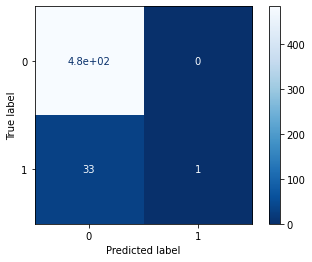

In [71]:
#confusion matrix
plot_confusion_matrix(estimator=model3, X=X_test, y_true=y_test, cmap='Blues_r')



The confusion matrix of this classifier is showing very less false predicted values among all models used here.


### At last, it can be concluded:
Out of three models used for this classification of hazardous and No-hazardous state, Catboost classifier algorithms and its model has been proven to be the best fitted model for this dataset. It attained 94% accuracy along with 0.21 log_loss which is better among all. Similar results are shown by Random Forest classifier also but its log-loss is comparatively higher among all. Therefore, Catboost Classifier is best for this seismic bumps dataset. The precision recall curve of catboost classifier is having highest area with least false positive and false negative rates, and the confusion matrix is also having better results with only 34 wrongly classified outputs.